In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Nivell 1 i 2
#### Exercicis 1,2,3,4,5
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

Vamos a crear 3 modelos con sendos algoritmos:
- Caso 1, regresión múltiple
- Caso 2, árbol de decisión
- Caso 3, random forest

In [2]:
#leemos el dataset
df=pd.read_csv('Desktop/DataScience/datasets/DelayedFlights/DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

Nuestra variable dependiente es ArrDelay, una variable float64 que mide el retraso a la llegada en minutos. Vamos a realizar la regresión a partir de la otras variables temporales, numéricas, float64 que están en las mismas unidades. Añadimos también la distancia, en total 12 variables. Si vemos que no obtenemos un buen ajuste iremos añadiendo otras variables del dataset.

In [4]:
df=df[['DepTime','CRSDepTime','ArrTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','TaxiIn','TaxiOut']]
df_=df.dropna() #Eliminamos nulos

In [5]:
df_.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0
2,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0
3,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0
4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0


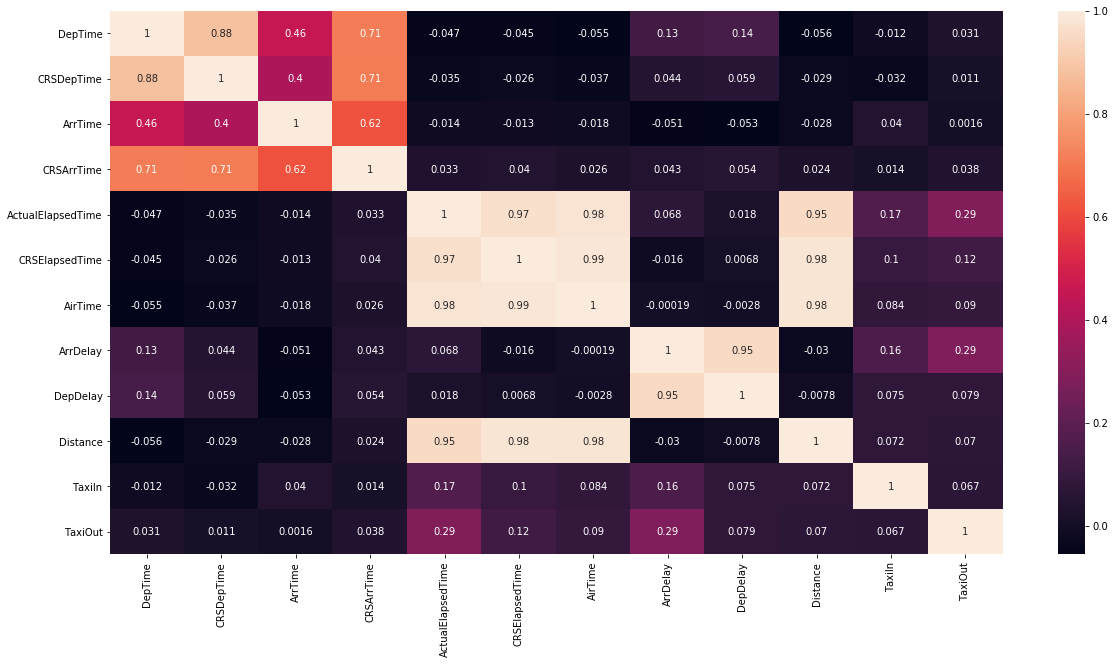

In [6]:
#Vamos a mirar variables correladas
plt.figure(figsize=(20,10))
sns.heatmap(df_.corr(), annot=True)
plt.show()

Mirando la columna de ArrDelay vemos que está muy correlada con DepDelay, podríamos hacer una regresión simple con esta variable y sería un buen modelo. El resto de variables están algo o poco correladas con ArrDelay.
Además las features (AirTime, CRSElapsedTime,ActualElapsedTime) y (ArrTime, CRSArrTime,CRSDepTime,DepTime) están muy correladas entre ellas por lo que deberemos prescindir de algunas de estas variables para mejorar la estimación final

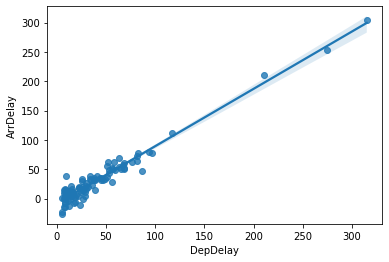

In [7]:
# con seaborn nos podemos hacer una idea de la regresión simple que podemos establecer entre estas dos variables
sns.regplot(x='DepDelay',y='ArrDelay',data=df_.iloc[0:100,:])
plt.show()

In [8]:
#Separamos el dataset por variables independientes y variable dependiente
X_=df_.drop(['ArrDelay'],'columns')
y_=df_.ArrDelay

In [9]:
X_.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,1.518648e+03,1.467718e+03,1.610242e+03,1.634196e+03,1.333059e+02,1.341977e+02,1.082771e+02,4.309169e+01,7.649486e+02,6.811388e+00,1.821733e+01
std,4.504352e+02,4.247281e+02,5.480009e+02,4.646284e+02,7.206007e+01,7.123339e+01,6.864261e+01,5.326600e+01,5.738858e+02,5.268051e+00,1.430838e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
25%,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01
50%,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01
75%,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.300000e+01,9.970000e+02,8.000000e+00,2.100000e+01
max,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02


In [10]:
# Tenemos diferentes medias y desviaciones.Estandarizamos con RobustScaler, 
# conseguiremos un modelo más robusto contra los outliers, ya sabemos que este dataset contiene muchos de anteriores
# notebooks
from sklearn.preprocessing import RobustScaler
X_t = RobustScaler().fit_transform(X_)
X_=pd.DataFrame(X_t,columns=X_.columns, index=X_.index)

In [11]:
#train y test sets (20% test set)
X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.2,random_state=42)

## Caso 1. Regresión simple y múltiple

In [14]:
# Regresión simple con DepDelay
# Vamos a poner intercept
model = sm.OLS(y_train,sm.add_constant(X_train.loc[:,'DepDelay']))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.523e+07
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        18:23:11   Log-Likelihood:            -6.5784e+06
No. Observations:             1542696   AIC:                         1.316e+07
Df Residuals:                 1542694   BIC:                         1.316e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8010      0.015   1549.309      0.000      22.772      22.830
DepDelay      41.6445      0.011   3902.616      0.000      41.624      41.665
==============================================================================
Omnibus:                  1026204.243   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32514482.086
Skew:                           2.755   Prob(JB):                         0.00
Kurtosis:                      24.806   Cond. No.                         1.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Usando como variable independiente DepDelay y añadiendo una constante obtenemos una bondad de ajuste R<sup>2</sup>=0.90. Vamos a probar con todas las variables numéricas que seleccionamos al principio a ver qué tal

In [15]:
# Regresión múltiple
# No vamos a usar intercept
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.662e+13
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        18:53:02   Log-Likelihood:             7.0260e+06
No. Observations:             1542696   AIC:                        -1.405e+07
Df Residuals:                 1542685   BIC:                        -1.405e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DepTime            2.786e-05   7.21e-06      3.864      0.000    1.37e-05     4.2e-05
CRSDepTime          -4.9e-05   7.39e-06     -6.633      0.000   -6.35e-05   -3.45e-05
ArrTime           -3.893e-05    3.5e-06    -11.130      0.000   -4.58e-05   -3.21e-05
CRSArrTime         6.078e-05   5.17e-06     11.754      0.000    5.06e-05    7.09e-05
ActualElapsedTime  -255.0000   3.39e-05  -7.52e+06      0.000    -255.000    -255.000
CRSElapsedTime      -83.0000   1.72e-05  -4.82e+06      0.000     -83.000     -83.000
AirTime             316.0000   3.42e-05   9.23e+06      0.000     316.000     316.000
DepDelay             41.0000   1.64e-06   2.51e+07      0.000      41.000      41.000
Distance           3.387e-06    1.4e-05      0.242      0.809    -2.4e-05    3.08e-05
TaxiIn               16.0000   2.13e-06   7.52e+06      0.000      16.000      16.000
TaxiOut              44.0000   4.28e-06   1.03e+07      0.000      44.000      44.000
================================================================================
Omnibus:                  7060522.381   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   1528946609385356.000
Skew:                         157.072   Prob(JB):                           0.00
Kurtosis:                  154230.104   Cond. No.                           42.8
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No hay multicolinealidad pero vemos, por el p-value de Distance, que esta variable no aporta información a la regresión. Vamos a descartarla.

In [16]:
model = sm.OLS(y_train,X_train.drop(['Distance'],axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.513e+13
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        18:53:18   Log-Likelihood:             7.0260e+06
No. Observations:             1542696   AIC:                        -1.405e+07
Df Residuals:                 1542686   BIC:                        -1.405e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DepTime            2.776e-05    7.2e-06      3.856      0.000    1.36e-05    4.19e-05
CRSDepTime        -4.886e-05   7.36e-06     -6.635      0.000   -6.33e-05   -3.44e-05
ArrTime           -3.896e-05   3.49e-06    -11.150      0.000   -4.58e-05   -3.21e-05
CRSArrTime         6.075e-05   5.17e-06     11.752      0.000    5.06e-05    7.09e-05
ActualElapsedTime  -255.0000   3.34e-05  -7.63e+06      0.000    -255.000    -255.000
CRSElapsedTime      -83.0000   1.48e-05   -5.6e+06      0.000     -83.000     -83.000
AirTime             316.0000   3.25e-05   9.71e+06      0.000     316.000     316.000
DepDelay             41.0000   1.63e-06   2.51e+07      0.000      41.000      41.000
TaxiIn               16.0000   2.12e-06   7.54e+06      0.000      16.000      16.000
TaxiOut              44.0000   4.26e-06   1.03e+07      0.000      44.000      44.000
================================================================================
Omnibus:                  7060520.841   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   1528946841539689.000
Skew:                         157.072   Prob(JB):                           0.00
Kurtosis:                  154230.116   Cond. No.                           37.9
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Coeficientes de la regresión, de mayor a menor
results.params.sort_values(ascending=False)

AirTime              316.000050
TaxiOut               44.000004
DepDelay              40.999996
TaxiIn                16.000002
CRSArrTime             0.000061
DepTime                0.000028
ArrTime               -0.000039
CRSDepTime            -0.000049
CRSElapsedTime       -83.000018
ActualElapsedTime   -255.000033
dtype: float64

Vemos que las variables 'CRSArrTime','DepTime','ArrTime','CRSDepTime' tienen coeficientes muy bajos que casi anulan
la información que la variable aporta a la regresión. Estas variables indican las horas cuando se producen los despegues y aterrizajes, tanto los reales como los previstos. Es una información que ya está introducida en las otras variables que miden los intervalos o las diferencias entre las horas previstas y reales. Las descartamos

In [18]:
lista=['Distance','CRSArrTime','DepTime','ArrTime','CRSDepTime' ]
model = sm.OLS(y_train,X_train.drop(lista,axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.532e+14
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        18:54:57   Log-Likelihood:             7.0259e+06
No. Observations:             1542696   AIC:                        -1.405e+07
Df Residuals:                 1542690   BIC:                        -1.405e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ActualElapsedTime  -255.0000   3.29e-05  -7.75e+06      0.000    -255.000    -255.000
CRSElapsedTime      -83.0000   1.48e-05  -5.62e+06      0.000     -83.000     -83.000
AirTime             316.0000   3.19e-05    9.9e+06      0.000     316.000     316.000
DepDelay             41.0000   1.59e-06   2.58e+07      0.000      41.000      41.000
TaxiIn               16.0000   2.11e-06   7.59e+06      0.000      16.000      16.000
TaxiOut              44.0000    4.2e-06   1.05e+07      0.000      44.000      44.000
================================================================================
Omnibus:                  7060965.670   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   1529715917229122.000
Skew:                         157.106   Prob(JB):                           0.00
Kurtosis:                  154268.900   Cond. No.                           37.2
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Coeficientes de la regresión, de mayor a menor
results.params.sort_values(ascending=False)

AirTime              316.000033
TaxiOut               44.000004
DepDelay              41.000000
TaxiIn                16.000001
CRSElapsedTime       -83.000008
ActualElapsedTime   -255.000024
dtype: float64

Vemos que el p-value del modelo y de las variables es inferior a alfa, no hay multicolinealidad y tenemos una bondad de ajuste demasiado buena

In [20]:
#train metrics
r2_train=np.round(results.rsquared,2)
y_pred=results.predict(X_train.drop(lista,axis=1))
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
print('Regresión múltiple (Train set):')
print('r2: %s, mse: %s' %(r2_train,mse_train))

Regresión múltiple (Train set):
r2: 1.0, mse: 0.0


In [21]:
#test metrics
y_pred1=results.predict(X_test.drop(lista,axis=1))
r2_test=np.round(r2_score(y_test,y_pred1),2)
mse_test=np.round(mean_squared_error(y_test,y_pred1),2)
print('Regresión múltiple (Test set):')
print('r2: %s, mse: %s' %(r2_test,mse_test))

Regresión múltiple (Test set):
r2: 1.0, mse: 0.0


In [22]:
# Guardamos métricas
resumen={}
resumen['Multiple regression']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

## Caso 2. Árbol de decisión

Vamos a trabajar solo con las variables que usamos en la regresión

In [24]:
model=DecisionTreeRegressor(max_depth=6,min_samples_leaf=20)
model.fit(X_train.drop(lista,axis=1),y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=20)

In [25]:
y_pred=model.predict(X_train.drop(lista,axis=1))
r2_train=np.round(r2_score(y_train,y_pred),2)
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
print('Árbol de decisión (Train set):')
print('r2: %s, mse: %s' %(r2_train,mse_train))

Árbol de decisión (Train set):
r2: 0.94, mse: 179.01


In [26]:
y_pred2=model.predict(X_test.drop(lista,axis=1))
r2_test=np.round(r2_score(y_test,y_pred2),2)
mse_test=np.round(mean_squared_error(y_test,y_pred2),2)
print('Árbol de decisión (Test set):')
print('r2: %s, mse: %s' %(r2_test,mse_test))

Árbol de decisión (Test set):
r2: 0.94, mse: 183.77


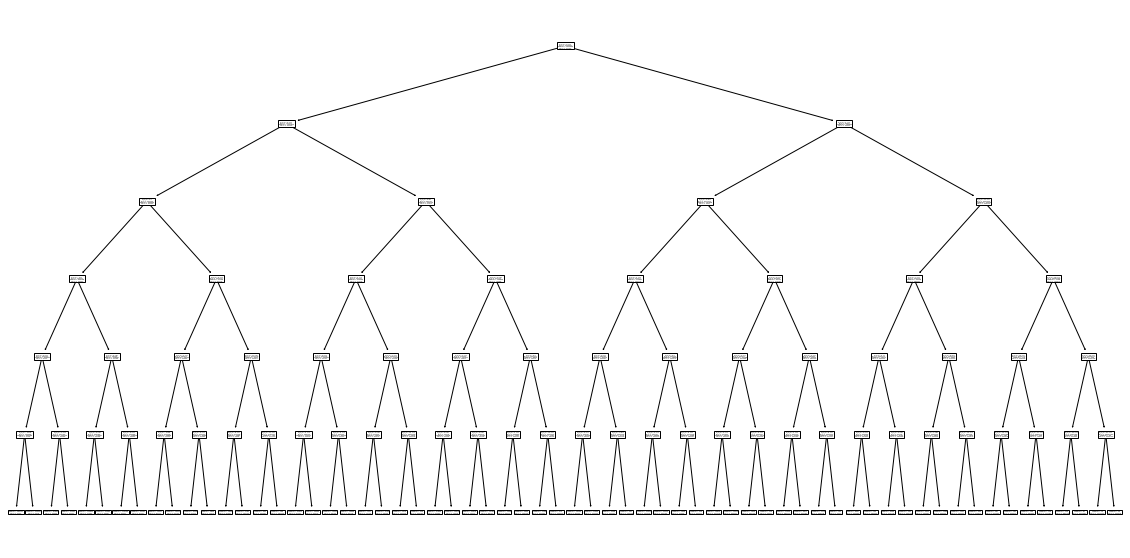

In [27]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model) 
plt.show()

In [28]:
resumen['Regression tree']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

## Caso 3. Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=7,min_samples_leaf=15,random_state=142 )
rf.fit(X_train.drop(lista,axis=1),y_train)

RandomForestRegressor(min_samples_leaf=15, n_estimators=7, random_state=142)

In [30]:
y_pred=rf.predict(X_train.drop(lista,axis=1))
r2_train=np.round(r2_score(y_train,y_pred),2)
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
print('Random Forest (Train set):')
print('r2: %s, mse: %s' %(r2_train,mse_train))

Random Forest (Train set):
r2: 0.99, mse: 17.52


In [31]:
y_pred3=rf.predict(X_test.drop(lista,axis=1))
r2_test=np.round(r2_score(y_test,y_pred3),2)
mse_test=np.round(mean_squared_error(y_test,y_pred3),2)
print('Random Forest (Test set):')
print('r2: %s, mse: %s' %(r2_test,mse_test))

Random Forest (Test set):
r2: 0.99, mse: 23.97


In [32]:
resumen['Random Forest']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

#### Comparación resultados

In [33]:
df_resumen=pd.DataFrame(resumen)
df_resumen

,Multiple regression,Regression tree,Random Forest
r2 train,1.0,0.94,0.99
r2 test,1.0,0.94,0.99
mse train,0.0,179.01,17.52
mse test,0.0,183.77,23.97


Vemos que el que tiene mejor comportamiento es la regresión múltiple, seguido del Random Forest y el árbol de decisión. No hay overfitting, las bondades de ajustes tanto de training y test son iguales. Aunque la MSE del test es superior a la de train set son valores muy parejos.
Además la regresión múltiple fue mucho más rápido que los otros dos algoritmos

**Visualización**

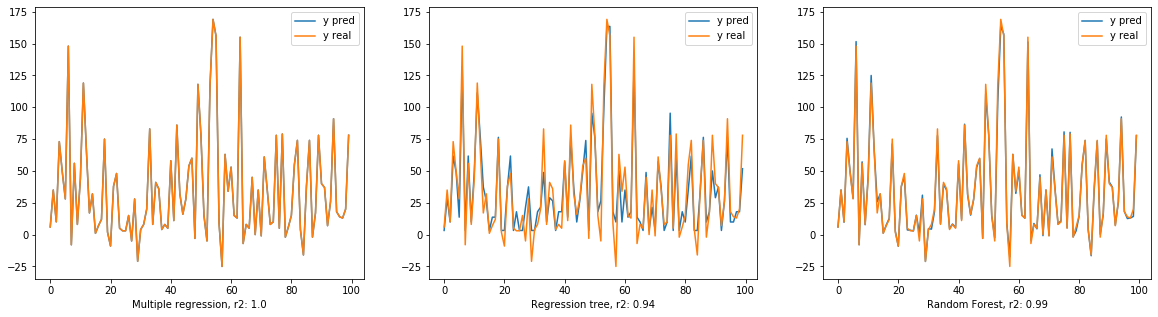

In [34]:
data=[y_pred1[0:100].values,y_pred2[0:100],y_pred3[0:100]]
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(data[i], label='y pred')
    plt.plot(y_test[0:100].values, label='y real')
    plt.xlabel('%s, r2: %s' %(df_resumen.columns[i],df_resumen.loc['r2 test',df_resumen.columns[i]]))
    plt.legend()
plt.show()

# Nivell 3
#### Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [35]:
# Quitamos la columna de DepDelay del train y test sets
X_train2=X_train.drop(['DepDelay'],axis=1)
X_test2=X_test.drop(['DepDelay'],axis=1)

#### Regresión múltiple

In [36]:
model2 = sm.OLS(y_train,X_train2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                 3.754e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        19:07:58   Log-Likelihood:            -8.2662e+06
No. Observations:             1542696   AIC:                         1.653e+07
Df Residuals:                 1542686   BIC:                         1.653e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DepTime              36.0714      0.143    252.961      0.000      35.792      36.351
CRSDepTime          -25.2372      0.148   -170.853      0.000     -25.527     -24.948
ArrTime             -12.2076      0.070   -174.620      0.000     -12.345     -12.071
CRSArrTime            4.3152      0.104     41.364      0.000       4.111       4.520
ActualElapsedTime  -489.4111      0.658   -744.082      0.000    -490.700    -488.122
CRSElapsedTime      -64.4891      0.347   -185.818      0.000     -65.169     -63.809
AirTime             526.4734      0.670    785.694      0.000     525.160     527.787
Distance            -11.0618      0.282    -39.178      0.000     -11.615     -10.508
TaxiIn               29.7225      0.041    716.656      0.000      29.641      29.804
TaxiOut              76.3324      0.082    926.704      0.000      76.171      76.494
==============================================================================
Omnibus:                  1584502.046   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        214472160.669
Skew:                           4.857   Prob(JB):                         0.00
Kurtosis:                      59.940   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#train metrics
r2_train=np.round(results2.rsquared,2)
y_pred=results2.predict(X_train2)
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
r2_train,mse_train

(0.18, 2640.53)

In [38]:
#test metrics
y_pred1=results2.predict(X_test2)
r2_test=np.round(r2_score(y_test,y_pred1),2)
mse_test=np.round(mean_squared_error(y_test,y_pred1),2)
r2_test,mse_test

(0.18, 2650.7)

In [39]:
# Guardamos métricas
resumen2={}
resumen2['Multiple regression']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

Al quitar la variable DepDelay del conjunto de variables independientes, el algoritmo de regresión tiene un comportamiento muy malo y solo es capaz de conseguir una bondad de ajuste del 18%

#### Árbol de decisión

Tanto en este caso como en Random Forest vamos a usar RandomizedSearchCV para encontrar los hiperparámetros de cada algoritmo que mejor respuesta tiene

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
param_dist = {'max_depth': range(2,16),
              'min_samples_split': range(2,16)}
n_iter_search = 20
rs_tree = RandomizedSearchCV(DecisionTreeRegressor(), 
                                   param_distributions=param_dist,
                                   cv=5 , n_jobs=-1, verbose=1,
                                   n_iter=n_iter_search)

In [42]:
rs_tree.fit(X_train2,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 16),
                                        'min_samples_split': range(2, 16)},
                   verbose=1)

In [43]:
rs_tree.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_split=3)

In [45]:
y_pred=rs_tree.predict(X_train2)
r2_train=np.round(r2_score(y_train,y_pred),2)
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
r2_train,mse_train

(0.93, 227.72)

In [46]:
y_pred2=rs_tree.predict(X_test2)
r2_test=np.round(r2_score(y_test,y_pred2),2)
mse_test=np.round(mean_squared_error(y_test,y_pred2),2)
r2_test,mse_test

(0.92, 260.31)

In [47]:
resumen2['Regression tree']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

#### Random Forest

In [52]:
param_dist={"max_depth":[6,8,None],
           "max_features": range(5,11),
           "min_samples_split": range(5,11)}
rf2=RandomForestRegressor(n_estimators=10,random_state=142 )

In [53]:
rs_random=RandomizedSearchCV(estimator=rf2,
                                param_distributions=param_dist,
                                n_iter=40,
                                cv=5)

In [54]:
rs_random.fit(X_train2,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=142),
                   n_iter=40,
                   param_distributions={'max_depth': [6, 8, None],
                                        'max_features': range(5, 11),
                                        'min_samples_split': range(5, 11)})

In [55]:
rs_random.best_estimator_

RandomForestRegressor(max_features=9, min_samples_split=5, n_estimators=10,
                      random_state=142)

In [56]:
y_pred=rs_random.best_estimator_.predict(X_train2)
r2_train=np.round(r2_score(y_train,y_pred),2)
mse_train=np.round(mean_squared_error(y_train,y_pred),2)
r2_train,mse_train

(1.0, 12.57)

In [57]:
y_pred3=rs_random.best_estimator_.predict(X_test2)
r2_test=np.round(r2_score(y_test,y_pred3),2)
mse_test=np.round(mean_squared_error(y_test,y_pred3),2)
r2_test,mse_test

(0.99, 44.68)

In [58]:
resumen2['Random Forest']={'r2 train':r2_train,'r2 test':r2_test,'mse train':mse_train,'mse test':mse_test}

In [59]:
df_resumen2=pd.DataFrame(resumen2)
df_resumen2

,Multiple regression,Regression tree,Random Forest
r2 train,0.18,0.93,1.00
r2 test,0.18,0.92,0.99
mse train,2640.53,227.72,12.57
mse test,2650.70,260.31,44.68


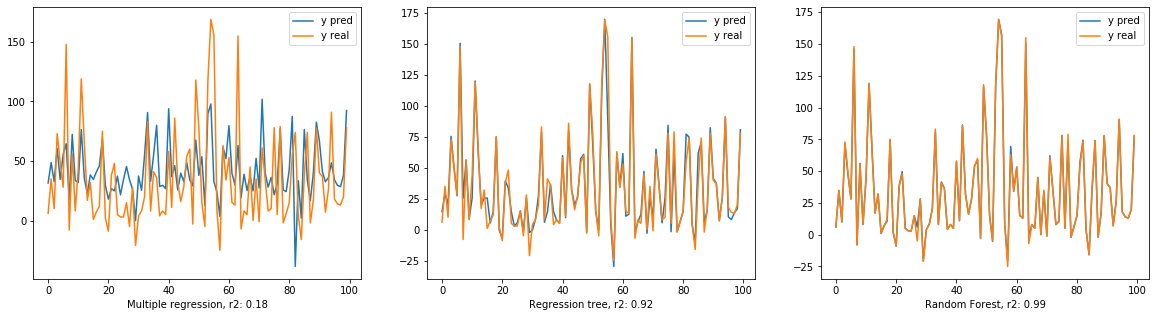

In [60]:
lista=[y_pred1[0:100].values,y_pred2[0:100],y_pred3[0:100]]
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(lista[i], label='y pred')
    plt.plot(y_test[0:100].values, label='y real')
    plt.xlabel('%s, r2: %s' %(df_resumen2.columns[i],df_resumen2.loc['r2 test',df_resumen2.columns[i]]))
    plt.legend()
plt.show()

Sacar la variable DepDelay hace que la regresión múltiple baje mucho su bondad de ajuste hasta un 18%. Hemos usado RandomSearchCV para localizar los mejores hiperparámetros de los otros dos modelos. El que mejor se comporta es Random Forest seguido del árbol de decisión con unas bondades de ajustes muy buenas en ambos casos.